In [23]:
# Run Initial Preparation of Data
%run app1_cust_seg_ml_prep.ipynb

Total Number of Duplicate Rows: 25876
ArrivalDateMonth: 12 unique values
Meal: 4 unique values
MarketSegment: 7 unique values
DistributionChannel: 4 unique values
ReservedRoomType: 7 unique values
AssignedRoomType: 8 unique values
DepositType: 3 unique values
CustomerType: 4 unique values
ReservationStatus: 3 unique values
['map_categories__GroupType' 'map_categories__BookingUrgency'
 'map_categories__HighDemand' 'map_categories__WaitingTimeCategory'
 'num__IsCanceled' 'num__LeadTime' 'num__ArrivalDateYear'
 'num__ArrivalDateMonth' 'num__ArrivalDateWeekNumber'
 'num__ArrivalDateDayOfMonth' 'num__StaysInWeekendNights'
 'num__StaysInWeekNights' 'num__Adults' 'num__Children' 'num__Babies'
 'num__Meal' 'num__MarketSegment' 'num__DistributionChannel'
 'num__IsRepeatedGuest' 'num__PreviousCancellations'
 'num__PreviousBookingsNotCanceled' 'num__ReservedRoomType'
 'num__AssignedRoomType' 'num__BookingChanges' 'num__DepositType'
 'num__Agent' 'num__Company' 'num__DaysInWaitingList' 'num__Custo

In [24]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
transformed_df  # Ready to Go Data

,map_categories__GroupType,map_categories__BookingUrgency,map_categories__HighDemand,map_categories__WaitingTimeCategory,num__IsCanceled,num__LeadTime,num__ArrivalDateYear,num__ArrivalDateMonth,num__ArrivalDateWeekNumber,num__ArrivalDateDayOfMonth,num__StaysInWeekendNights,num__StaysInWeekNights,num__Adults,num__Children,num__Babies,num__Meal,num__MarketSegment,num__DistributionChannel,num__IsRepeatedGuest,num__PreviousCancellations,num__PreviousBookingsNotCanceled,num__ReservedRoomType,num__AssignedRoomType,num__BookingChanges,num__DepositType,num__Agent,num__Company,num__DaysInWaitingList,num__CustomerType,num__ADR,num__RequiredCarParkingSpaces,num__TotalOfSpecialRequests,num__ReservationStatus,num__ReservationStatusYear,num__ReservationStatusMonth,num__ReservationStatusDay,num__TotalStay,num__SpendingPerPerson,num__LoyaltyScore,num__ChildRatio,num__Occupancy,num__CancellationRisk,cat__GroupType_Big_Group,cat__GroupType_Couple,cat__GroupType_Family,cat__GroupType_Single,cat__BookingUrgency_Early_Booking,cat__BookingUrgency_Last_Minute_Booking,cat__BookingUrgency_Medium_Term_Booking,cat__HighDemand_High,cat__HighDemand_Low,cat__WaitingTimeCategory_Long,cat__WaitingTimeCategory_Medium,cat__WaitingTimeCategory_Short
0,0.0,2.0,0.0,0.0,-0.656114,-0.874411,-1.902984,0.185429,0.027139,-1.676536,-0.962296,-0.170768,-1.646194,-0.298667,-0.071574,1.163539,-0.164441,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.322338,-0.176568,-0.085664,-0.14545,-2.328143,-0.191229,-0.853375,0.573434,-1.879786,0.241861,-1.452015,-0.559220,-2.005682,-0.101771,-0.30974,-0.597570,-0.061833,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.524125,0.124226,-1.902984,0.185429,0.027139,-1.676536,-0.962296,1.088495,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,0.346106,-1.527907,-1.879786,0.241861,-1.680519,0.420197,-0.714124,-0.101771,-0.30974,-0.597570,-0.061833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.524125,-0.155879,-1.902984,0.185429,0.027139,-1.676536,-0.962296,1.088495,-1.646194,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.905480,-0.191229,0.346106,-1.527907,-1.879786,-0.691841,1.632780,0.420197,0.290421,-0.101771,-0.30974,-0.989074,-0.061833,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.524125,0.172940,-1.902984,0.185429,0.027139,-1.676536,1.248033,1.088495,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,1.545586,-1.527907,-1.879786,-0.069373,0.833018,1.399613,-0.714124,-0.101771,-0.30974,-0.858573,-0.061833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.524125,0.270368,-1.902984,0.185429,0.027139,-1.562928,-0.962296,-0.170768,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,0.346106,-1.527907,-1.879786,-0.691841,-1.566267,-0.559220,-0.714124,-0.101771,-0.30974,0.185439,-0.061833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53262,1.0,2.0,0.0,0.0,-0.656114,-0.667376,1.131434,0.510832,0.616286,1.618099,1.248033,1.718127,0.220775,-0.298667,-0.071574,-0.534495,-0.164441,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,8.356016,-0.176568,-0.085664,-0.14545,-0.316749,-0.191229,-0.853375,0.573434,1.183060,0.864329,-1.109260,1.889321,-0.382540,-0.101771,-0.30974,-0.933

#### 1. Find Optimal K

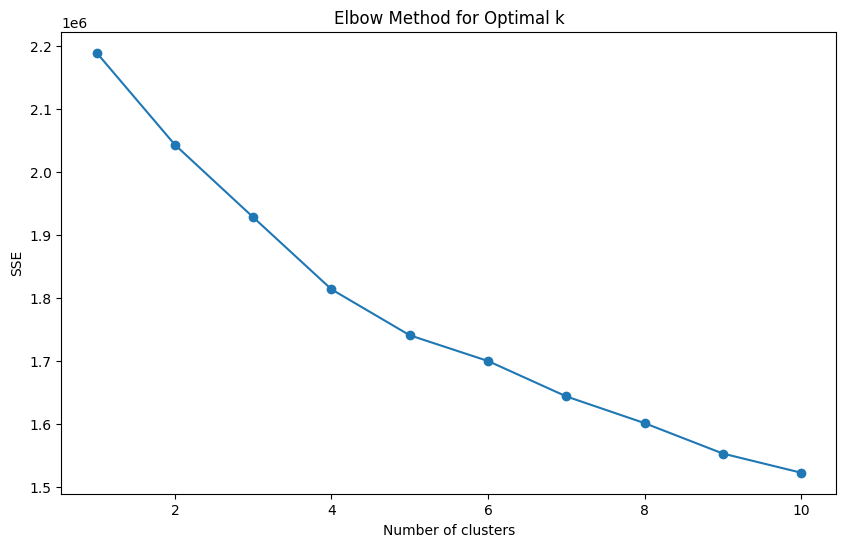

In [26]:
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

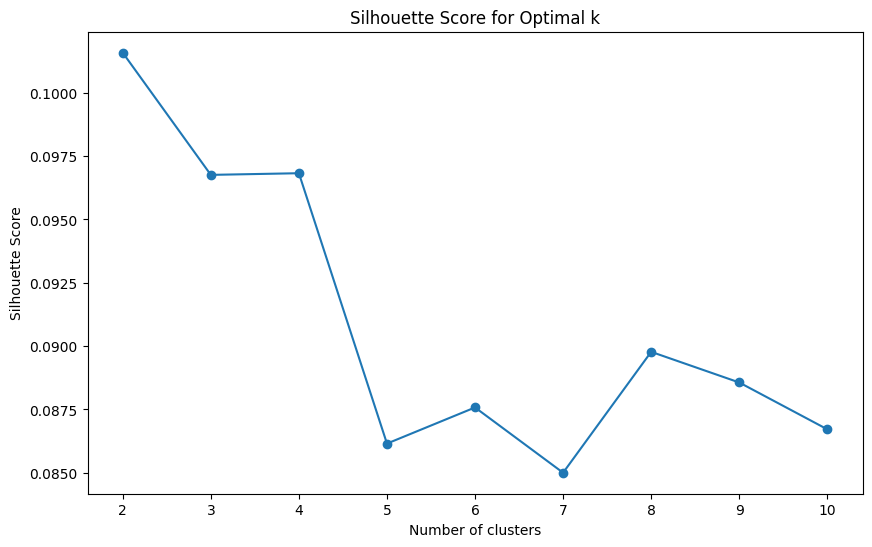

In [27]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_df)
    score = silhouette_score(transformed_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

Although it seems like the elbow is at point 5, the Silhouette score has dropped significantly at 5. Choosing the Number of Cluster as **4** or **8** would be the best solution.

#### 2. Train the K-Means Model

In [28]:
# KMeans with 4 clusters
kmeans = KMeans(n_clusters=8, random_state=42)

y_pred = kmeans.fit_predict(transformed_df)

In [29]:
# Add cluster labels to the original dataframe
transformed_df['Cluster'] = y_pred

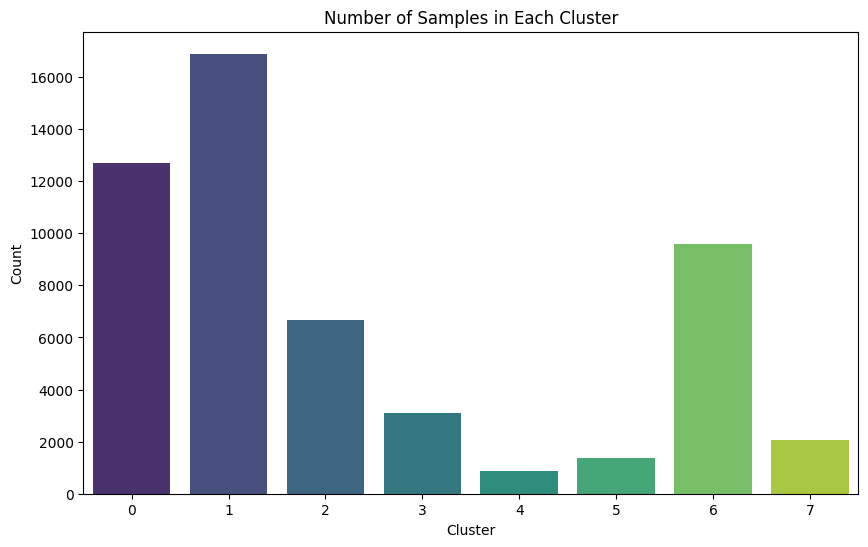

In [30]:
# Countplot for visualizing the number of samples in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=transformed_df, palette='viridis')
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

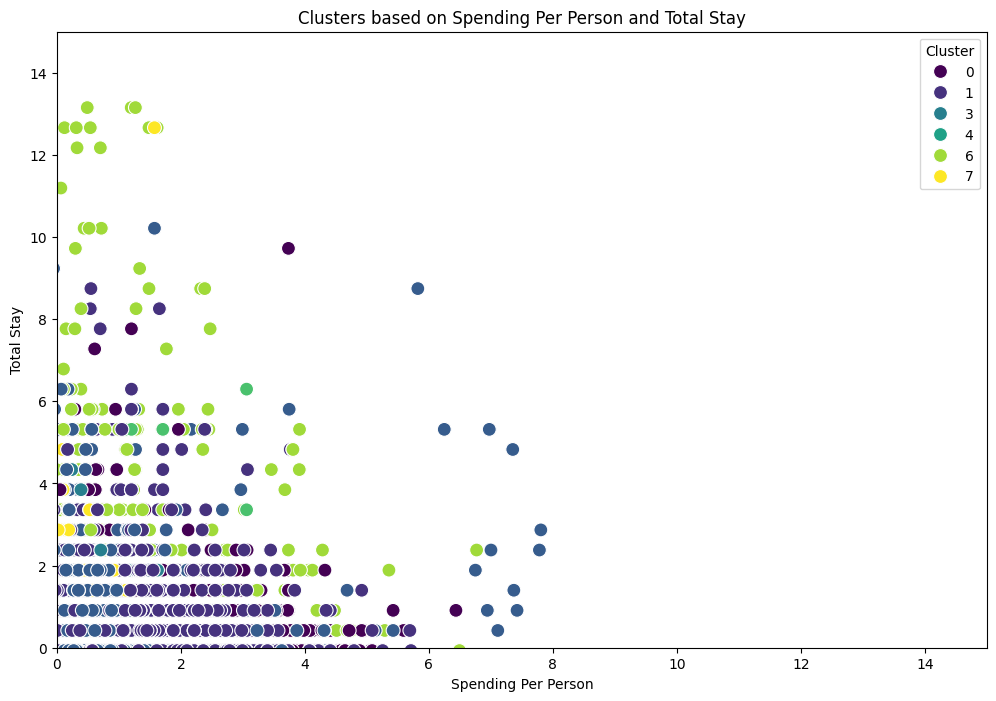

In [32]:
from matplotlib.patches import Ellipse
import numpy as np

plt.figure(figsize=(12, 8))
sns.scatterplot(x='num__SpendingPerPerson', y='num__TotalStay', hue='Cluster', data=transformed_df, palette='viridis', s=100)
plt.title('Clusters based on Spending Per Person and Total Stay')
plt.xlabel('Spending Per Person')
plt.ylabel('Total Stay')
plt.legend(title='Cluster')

# Yoğun olan bölgeyi yakından göstermek için limitleri ayarlayalım
plt.xlim(0, 15)  # Spending Per Person için limitler
plt.ylim(0, 15)   # Total Stay için limitler

plt.show()